### Notebook - Table of Content

1. [**Importing necessary libraries**](#1.-Importing-necessary-libraries)   
2. [**Loading data**](#2.-Loading-data)  
3. [**Data preprocessing**](#3.-Data-preprocessing)  
    3.a [**Checking for duplicates**](#3.a-Checking-for-duplicates)  
    3.b [**Checking for missing values**](#3.b-Checking-for-missing-values)  
    3.c [**Checking for class imbalance**](#3.c-Checking-for-class-imbalance)  
4. [**Exploratory Data Analysis**](#4.-Exploratory-Data-Analysis)  
    4.a [**Analysing tBodyAccMag-mean feature**](#4.a-Analysing-tBodyAccMag-mean-feature)  
    4.b [**Analysing Angle between X-axis and gravityMean feature**](#4.b-Analysing-Angle-between-X-axis-and-gravityMean-feature)  
    4.c [**Analysing Angle between Y-axis and gravityMean feature**](#4.c-Analysing-Angle-between-Y-axis-and-gravityMean-feature)   
    4.d [**Visualizing data using t-SNE**](#4.d-Visualizing-data-using-t-SNE)
5. [**Headline based similarity on new articles**](#6.-Headline-based-similarity-on-new-articles)  
    5.a [**Logistic regression model with Hyperparameter tuning and cross validation**](#5.a-Logistic-regression-model-with-Hyperparameter-tuning-and-cross-validation)  
    5.b [**Linear SVM model with Hyperparameter tuning and cross validation**](#5.b-Linear-SVM-model-with-Hyperparameter-tuning-and-cross-validation)  
    5.c [**Kernel SVM model with Hyperparameter tuning and cross validation**](#5.c-Kernel-SVM-model-with-Hyperparameter-tuning-and-cross-validation)   
    5.d [**Decision tree model with Hyperparameter tuning and cross validation**](#5.d-Decision-tree-model-with-Hyperparameter-tuning-and-cross-validation)  
    5.e [**Random forest model with Hyperparameter tuning and cross validation**](#5.e-Random-forest-model-with-Hyperparameter-tuning-and-cross-validation)  

### 1. Importing necessary libraries

In [20]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

#remove future warnings
import warnings
warnings.filterwarnings("ignore")

### 2. Loading data

In [3]:
train = pd.read_csv("./Dataset/train.csv.zip")
test = pd.read_csv("./Dataset/test.csv.zip")

In [60]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [61]:
train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


### 3. Data preprocessing

#### 3.a Checking for duplicates 

In [4]:
print('Number of duplicates in train : ',sum(train.duplicated()))
print('Number of duplicates in test : ', sum(test.duplicated()))

Number of duplicates in train :  0
Number of duplicates in test :  0


#### 3.b Checking for missing values

In [5]:
print('Total number of missing values in train : ', train.isna().values.sum())
print('Total number of missing values in train : ', test.isna().values.sum())

Total number of missing values in train :  0
Total number of missing values in train :  0


#### 3.c Checking for class imbalance

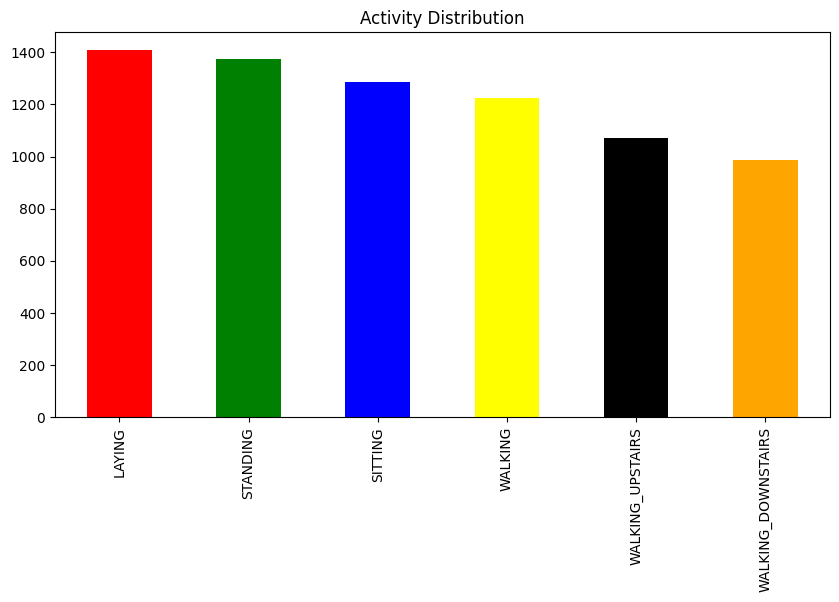

In [14]:
train.Activity.value_counts().plot(kind='bar', figsize=(10,5), title='Activity Distribution',color=['red','green','blue','yellow','black','orange'])
plt.show()

There is almost same number of observations across all the six activities so this data does not have class imbalance problem. 

### 4. Exploratory Data Analysis

Based on the common nature of activities we can broadly put them in two categories.
- **Static and dynamic activities :**
    - SITTING, STANDING, LAYING can be considered as static activities with no motion involved
    - WALKING, WALKING_DOWNSTAIRS, WALKING_UPSTAIRS can be considered as dynamic activities with significant amount of motion involved    
    
Let's consider **tBodyAccMag-mean()** feature to differentiate among these two broader set of activities.

If we try to build a simple classification model to classify the **activity** using one variable at a time then probability density function(PDF) is very helpful to assess importance of a continuous variable.

#### 4.a Analysing tBodyAccMag-mean feature

Text(0.1, 9, 'Dynamic Activities')

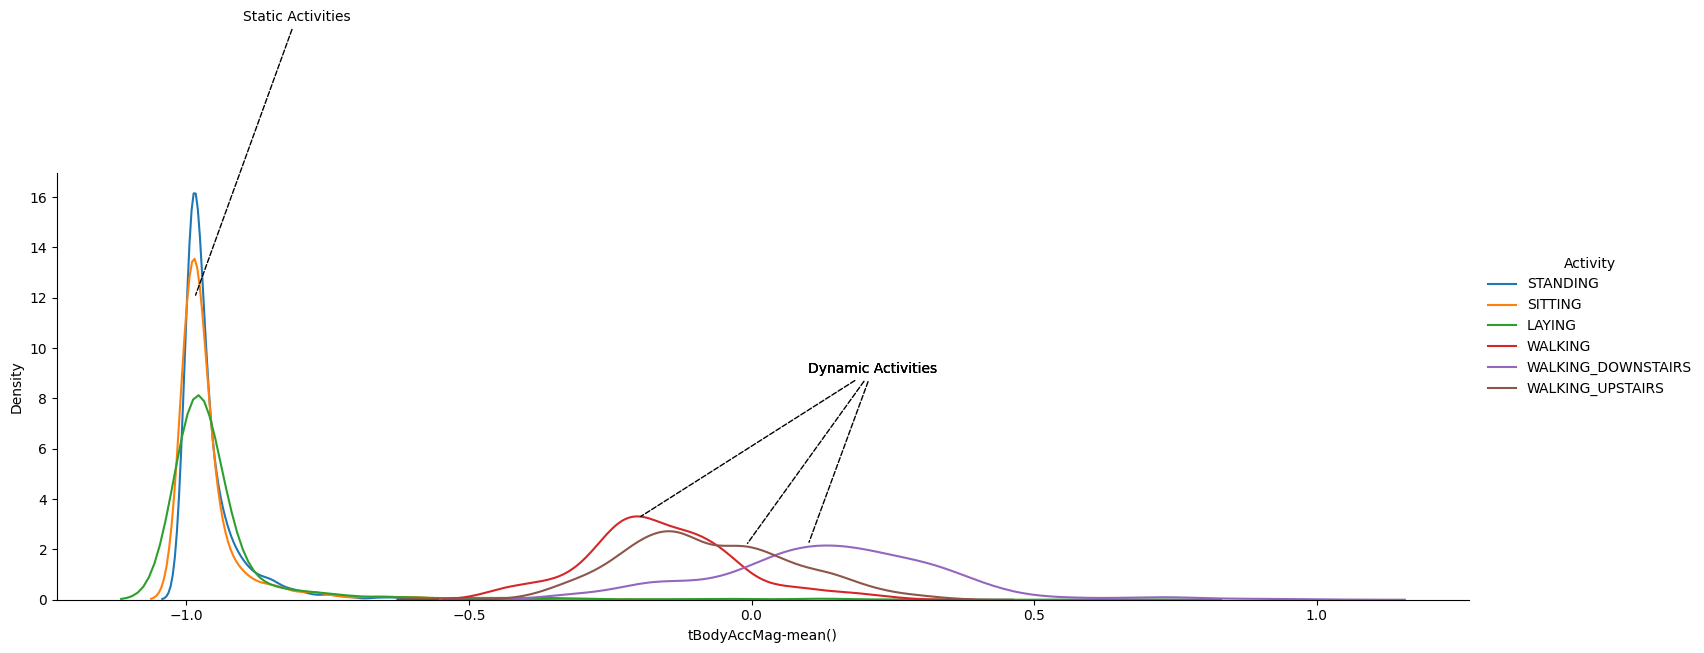

In [19]:
facetgrid = sns.FacetGrid(train, hue='Activity', height=5,aspect=3)
facetgrid.map(sns.distplot,'tBodyAccMag-mean()', hist=False).add_legend()
plt.annotate("Static Activities", xy=(-.996,21), xytext=(-0.9, 23),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static Activities", xy=(-.999,26), xytext=(-0.9, 23),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static Activities", xy=(-0.985,12), xytext=(-0.9, 23),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(-0.2,3.25), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(0.1,2.18), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(-0.01,2.15), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})

Using the above density plot we can easily come with a condition to seperate static activities from dynamic activities.

``` 
if(tBodyAccMag-mean()<=-0.5):
    Activity = "static"
else:
    Activity = "dynamic"
```

Let's have a more closer view on the PDFs of each activity under static and dynamic categorization.

<AxesSubplot:title={'center':'Dynamic Activities(closer view)'}, xlabel='tBodyAccMag-mean()', ylabel='Density'>

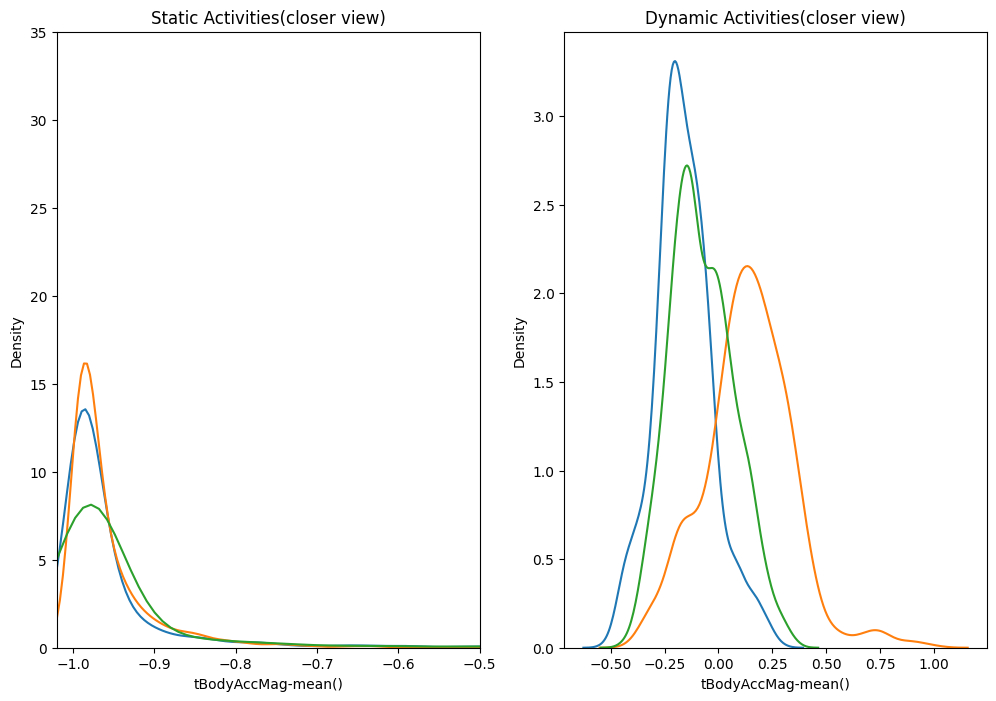

In [21]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Static Activities(closer view)")
sns.distplot(train[train["Activity"]=="SITTING"]['tBodyAccMag-mean()'],hist = False, label = 'Sitting')
sns.distplot(train[train["Activity"]=="STANDING"]['tBodyAccMag-mean()'],hist = False,label = 'Standing')
sns.distplot(train[train["Activity"]=="LAYING"]['tBodyAccMag-mean()'],hist = False, label = 'Laying')
plt.axis([-1.02, -0.5, 0, 35])
plt.subplot(1,2,2)
plt.title("Dynamic Activities(closer view)")
sns.distplot(train[train["Activity"]=="WALKING"]['tBodyAccMag-mean()'],hist = False, label = 'Sitting')
sns.distplot(train[train["Activity"]=="WALKING_DOWNSTAIRS"]['tBodyAccMag-mean()'],hist = False,label = 'Standing')
sns.distplot(train[train["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMag-mean()'],hist = False, label = 'Laying')
plt.show()

The insights obtained through density plots can also be represented using Box plots.
Let's plot the boxplot of Body Accelartion Magnitude mean(tBodyAccMag-mean()) across all the six categories.

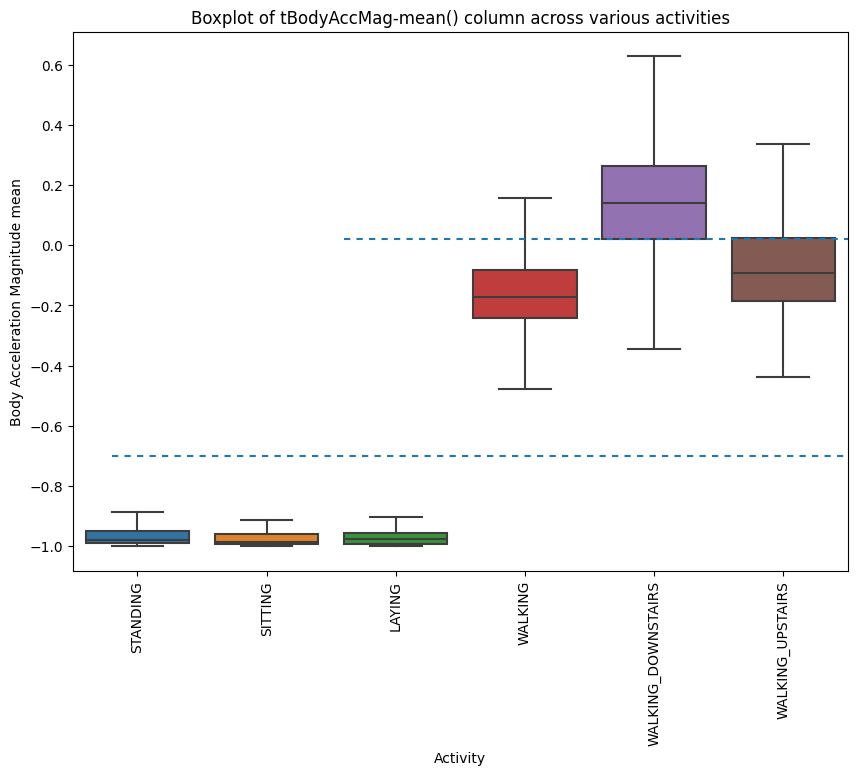

In [31]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='tBodyAccMag-mean()',data=train, showfliers=False)
plt.ylabel('Body Acceleration Magnitude mean')
plt.title("Boxplot of tBodyAccMag-mean() column across various activities")
plt.axhline(y=-0.7, xmin=0.05,dashes=(3,3))
plt.axhline(y=0.020, xmin=0.35, dashes=(3,3))
plt.xticks(rotation=90)
plt.show()

Using boxplot again we can come with conditions to seperate static activities from dynamic activities.

``` 
if(tBodyAccMag-mean()<=-0.8):
    Activity = "static"
if(tBodyAccMag-mean()>=-0.6):
    Activity = "dynamic"
``` 

Also, we can easily seperate WALKING_DOWNSTAIRS activity from others using boxplot.

``` 
if(tBodyAccMag-mean()>0.02):
    Activity = "WALKING_DOWNSTAIRS"
else:
    Activity = "others"
```

But still 25% of WALKING_DOWNSTAIRS observations are below 0.02 which are misclassified as **others** so this condition makes an error of 25% in classification.

#### 4.b Analysing Angle between X-axis and gravityMean feature

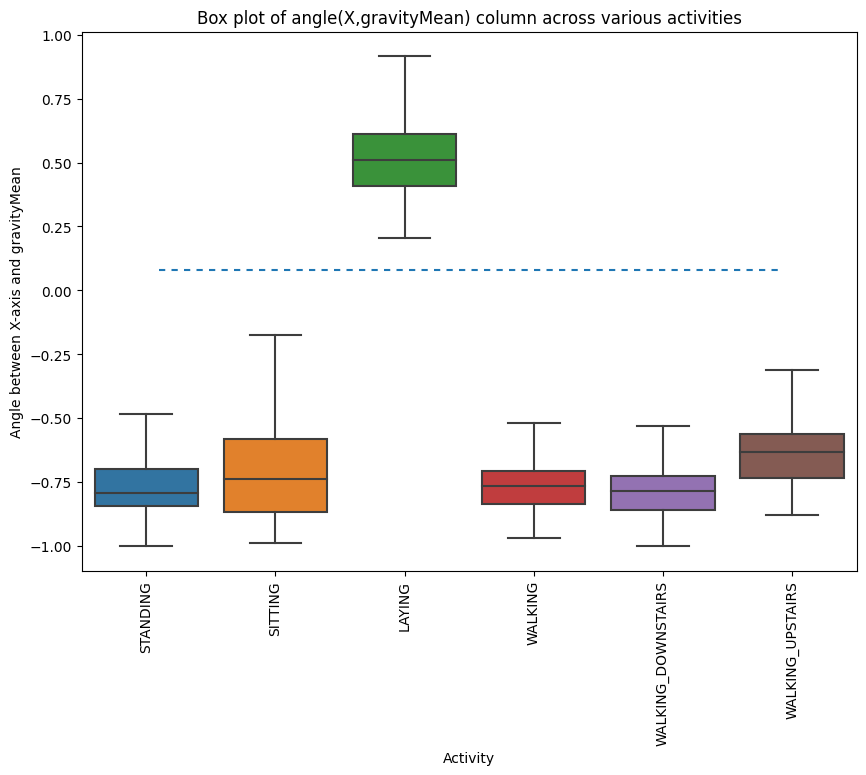

In [30]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=train, showfliers=False)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,dashes=(3,3))
plt.ylabel("Angle between X-axis and gravityMean")
plt.title('Box plot of angle(X,gravityMean) column across various activities')
plt.xticks(rotation = 90)
plt.show()

From the boxplot we can observe that angle(X,gravityMean) perfectly seperates LAYING from other activities.
``` 
if(angle(X,gravityMean)>0.01):
    Activity = "LAYING"
else:
    Activity = "others"
```

#### 4.c Analysing Angle between Y-axis and gravityMean feature

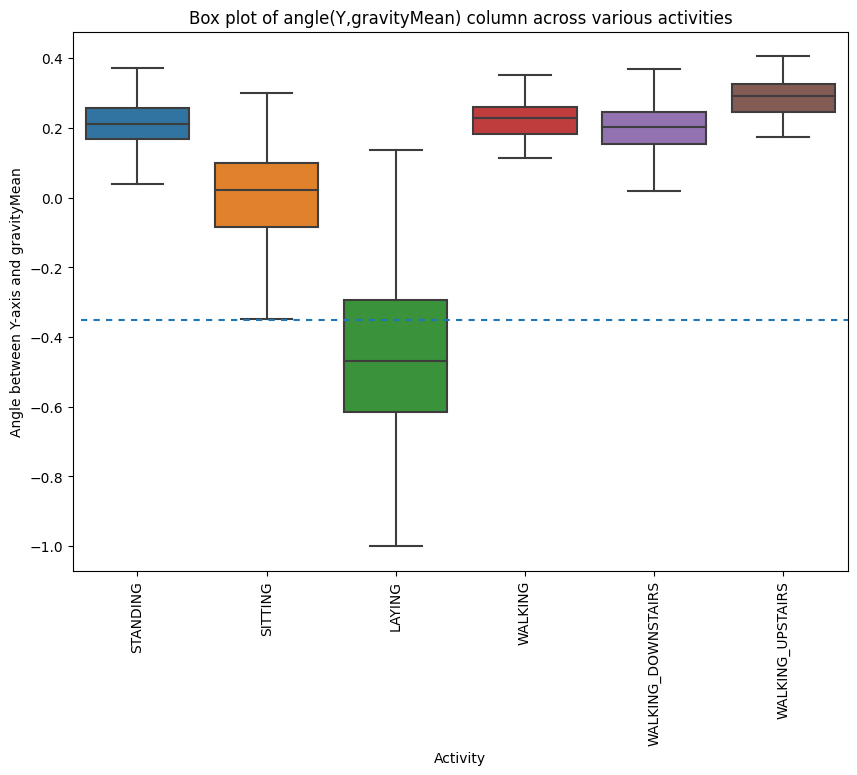

In [29]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='angle(Y,gravityMean)', data = train, showfliers=False)
plt.ylabel("Angle between Y-axis and gravityMean")
plt.title('Box plot of angle(Y,gravityMean) column across various activities')
plt.xticks(rotation = 90)
plt.axhline(y=-0.35, xmin=0.01, dashes=(3,3))
plt.show()

Similarly, using Angle between Y-axis and gravityMean we can seperate LAYING from other activities but again it leads to some misclassification error.  

### 4.d Visualizing data using t-SNE

Using t-SNE data can be visualized from a extremely high dimensional space to a low dimensional space and still it retains lots of actual information.
Given training data has 561 unqiue features, using t-SNE let's visualize it to a 2D space.

In [25]:
from sklearn.manifold import TSNE

In [26]:
X_for_tsne = train.drop(['subject', 'Activity'], axis=1)

In [27]:
%time
tsne = TSNE(random_state = 42, n_components=2, verbose=1, perplexity=50, n_iter=1000).fit_transform(X_for_tsne)

Wall time: 0 ns
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.012s...
[t-SNE] Computed neighbors for 7352 samples in 4.025s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.125458
[t-SNE] KL divergence after 1000 iterations: 1.280825


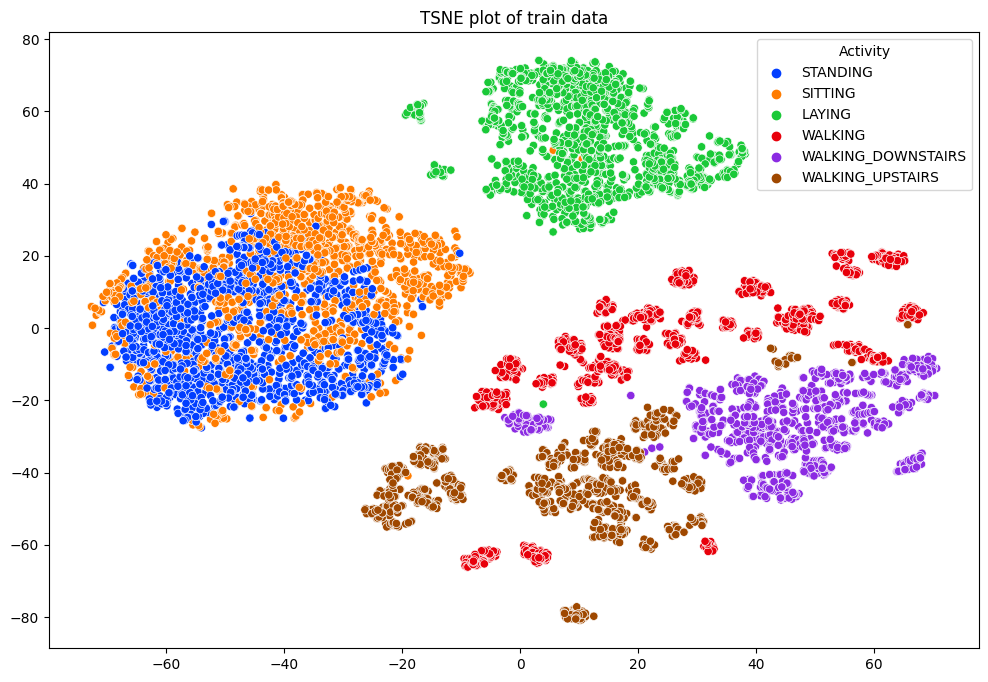

In [28]:
plt.figure(figsize=(12,8))
sns.scatterplot(x =tsne[:, 0], y = tsne[:, 1], hue = train["Activity"],palette="bright")
plt.title("TSNE plot of train data")
plt.show()

Using the two new components obtained through t-SNE we can visualize and seperate all the six activities in a 2D space. 

### 5. ML models

#### Getting training and test data ready

In [32]:
y_train = train.Activity
X_train = train.drop(['subject', 'Activity'], axis=1)
y_test = test.Activity
X_test = test.drop(['subject', 'Activity'], axis=1)
print('Training data size : ', X_train.shape)
print('Test data size : ', X_test.shape)

Training data size :  (7352, 561)
Test data size :  (2947, 561)


### 5.a Logistic regression model with Hyperparameter tuning and cross validation

Logistic regression is a popular machine learning algorithm for binary classification problems. It models the relationship between the dependent variable and one or more independent variables by fitting a logistic function to the data. In your project, you likely used logistic regression to classify human activity into two categories, such as "active" and "inactive".

Hyperparameter tuning refers to the process of selecting the best hyperparameters for a machine learning model. Hyperparameters are parameters that are not learned from the data during training, but rather set before the training process begins. In the case of logistic regression, some common hyperparameters include the regularization parameter and the optimization algorithm used to find the best coefficients.

To determine the optimal hyperparameters, you likely used cross-validation. Cross-validation is a technique that splits the available data into multiple subsets, called folds, and uses them to evaluate the performance of the model. By comparing the performance of the model with different hyperparameters on each fold, you can obtain a more reliable estimate of its performance on unseen data.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [35]:
parameters = {'C':np.arange(10,61,10), 'penalty':['l2','l1']}
lr_classifier = LogisticRegression()
lr_classifier_rs = RandomizedSearchCV(lr_classifier, param_distributions=parameters, cv=5,random_state = 42)
lr_classifier_rs.fit(X_train, y_train)
y_pred = lr_classifier_rs.predict(X_test)

In [36]:
lr_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Logistic Regression : ", lr_accuracy)

Accuracy using Logistic Regression :  0.9569053274516457


In [37]:
# function to plot confusion matrix
def plot_confusion_matrix(cm,lables):
    fig, ax = plt.subplots(figsize=(12,8)) # for plotting confusion matrix as image
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=lables, yticklabels=lables,
    ylabel='True label',
    xlabel='Predicted label')
    plt.xticks(rotation = 90)
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

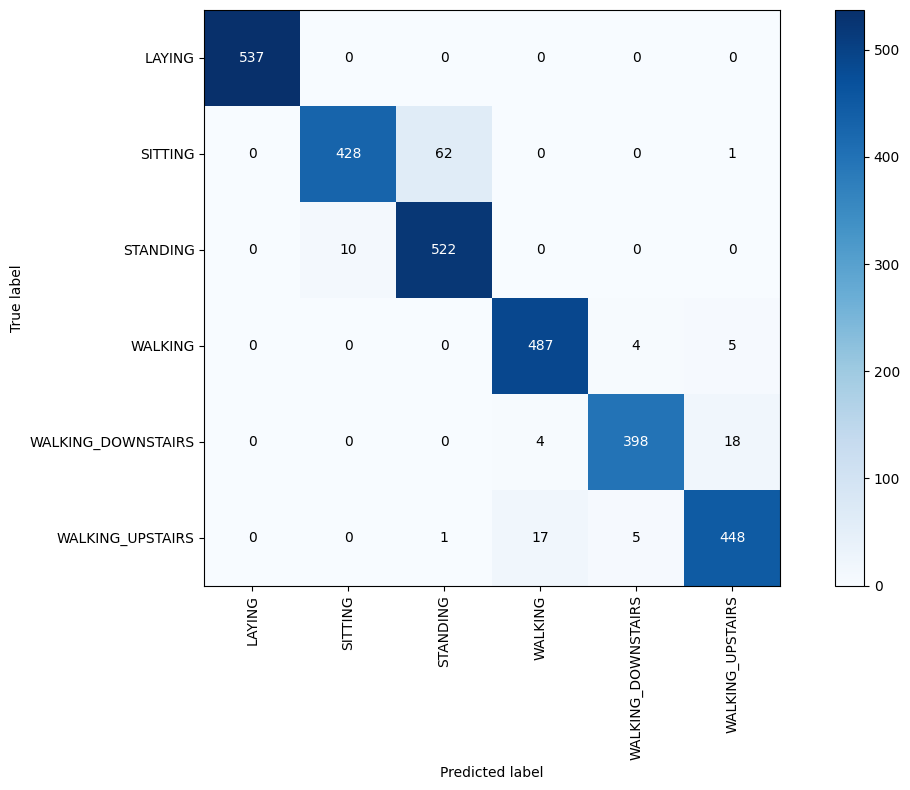

In [38]:
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))  # plotting confusion matrix

In [39]:
#function to get best random search attributes
def get_best_randomsearch_results(model):
    print("Best estimator : ", model.best_estimator_)
    print("Best set of parameters : ", model.best_params_)
    print("Best score : ", model.best_score_)

In [40]:
# getting best random search attributes
get_best_randomsearch_results(lr_classifier_rs)

Best estimator :  LogisticRegression(C=60)
Best set of parameters :  {'penalty': 'l2', 'C': 60}
Best score :  0.9341744474812359


### 5.b Linear SVM model with Hyperparameter tuning and cross validation

Support Vector Machines (SVMs) are a type of machine learning algorithm commonly used for classification and regression analysis. In your project, you likely used a linear SVM to classify human activity based on the Human Activity Dataset.

A linear SVM model finds the best hyperplane that separates the data into two classes, with the largest margin possible. This margin is defined as the distance between the closest data points from each class to the hyperplane. The data points closest to the hyperplane are called support vectors, and they play a key role in determining the location of the hyperplane.

The linear SVM model is particularly useful when the data is not linearly separable, as it can be transformed into a higher-dimensional space where a linear separation is possible. By using a linear SVM, you aimed to capture the underlying relationships between the features and the activity class, and make accurate predictions based on these relationships.

In summary, the linear SVM model was a valuable tool for classifying human activity in your project, as it can effectively handle complex non-linear relationships in the data and achieve high accuracy for binary classification tasks.



In [41]:
from sklearn.svm import LinearSVC

In [42]:
parameters = {'C':np.arange(1,12,2)}
lr_svm = LinearSVC(tol=0.00005)
lr_svm_rs = RandomizedSearchCV(lr_svm, param_distributions=parameters,random_state = 42)
lr_svm_rs.fit(X_train, y_train)
y_pred = lr_svm_rs.predict(X_test)

In [43]:
lr_svm_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using linear SVM : ",lr_svm_accuracy)

Accuracy using linear SVM :  0.9691211401425178


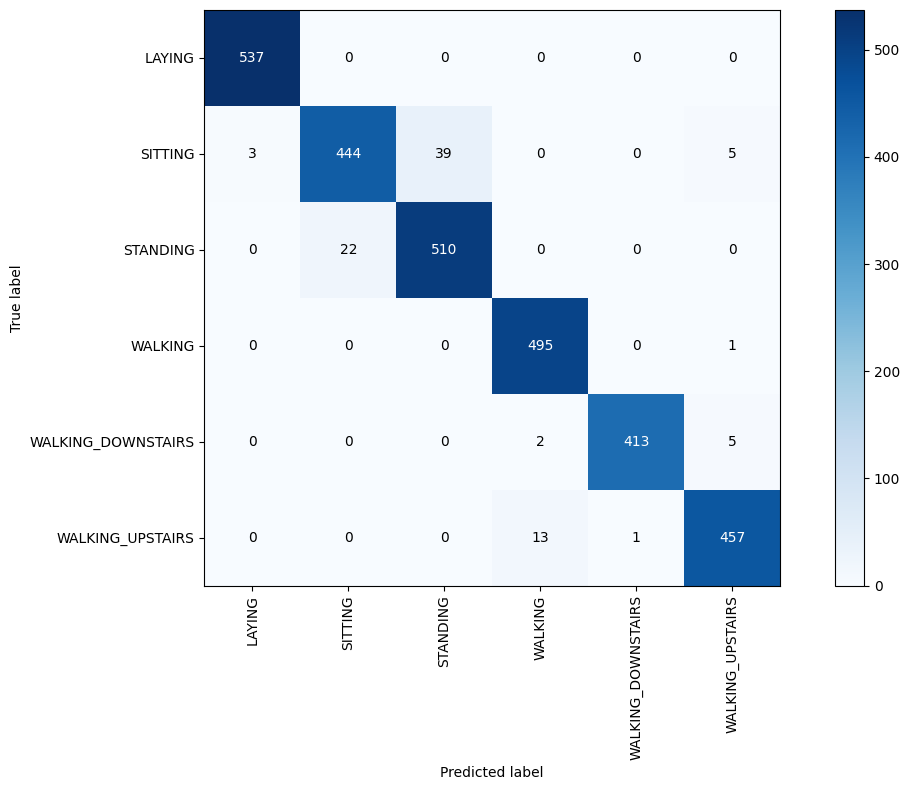

In [44]:
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred)) # plotting confusion matrix

In [45]:
# getting best random search attributes
get_best_randomsearch_results(lr_svm_rs)

Best estimator :  LinearSVC(C=9, tol=5e-05)
Best set of parameters :  {'C': 9}
Best score :  0.9392082761044594


### 5.c Kernel SVM model with Hyperparameter tuning and cross validation

In [46]:
from sklearn.svm import SVC

In [47]:
np.linspace(2,22,6)

array([ 2.,  6., 10., 14., 18., 22.])

In [48]:
parameters = {'C':[2,4,8,16],'gamma': [0.125, 0.250, 0.5, 1]}
kernel_svm = SVC(kernel='rbf')
kernel_svm_rs = RandomizedSearchCV(kernel_svm,param_distributions=parameters,random_state = 42)
kernel_svm_rs.fit(X_train, y_train)
y_pred = kernel_svm_rs.predict(X_test)

In [49]:
kernel_svm_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Kernel SVM : ", kernel_svm_accuracy)

Accuracy using Kernel SVM :  0.9423142178486597


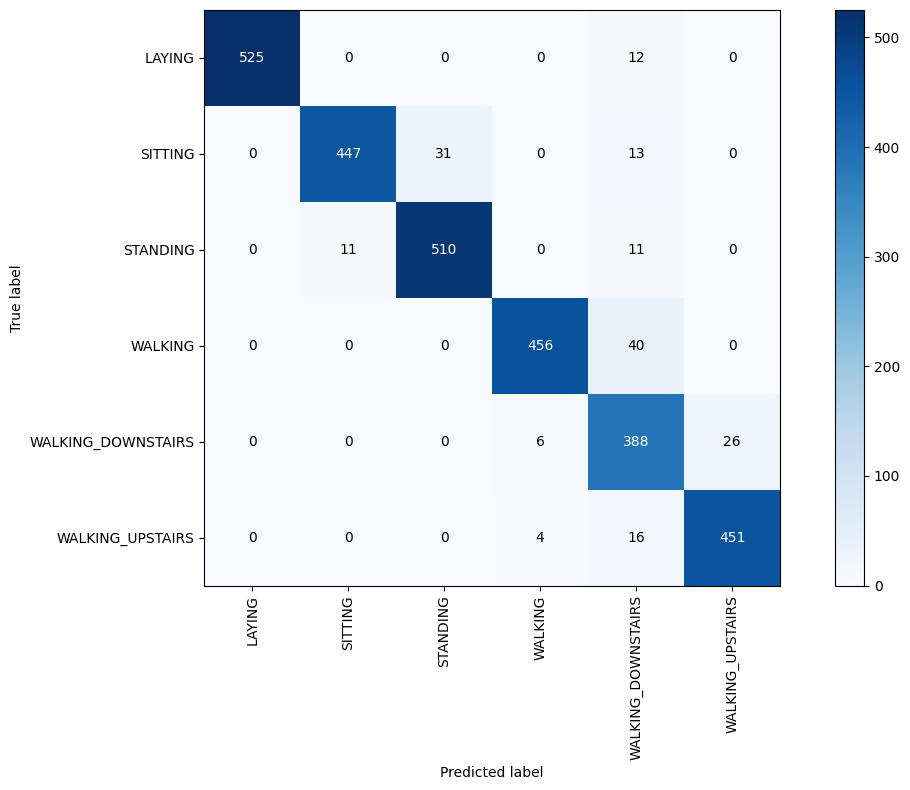

In [50]:
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred)) # plotting confusion matrix

In [51]:
# getting best random search attributes
get_best_randomsearch_results(kernel_svm_rs)

Best estimator :  SVC(C=8, gamma=0.125)
Best set of parameters :  {'gamma': 0.125, 'C': 8}
Best score :  0.896632121237346


### 5.d Decision tree model with Hyperparameter tuning and cross validation

In [52]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(2,10,2)}
dt_classifier = DecisionTreeClassifier()
dt_classifier_rs = RandomizedSearchCV(dt_classifier,param_distributions=parameters,random_state = 42)
dt_classifier_rs.fit(X_train, y_train)
y_pred = dt_classifier_rs.predict(X_test)

In [53]:
dt_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Decision tree : ", dt_accuracy)

Accuracy using Decision tree :  0.8724126230064473


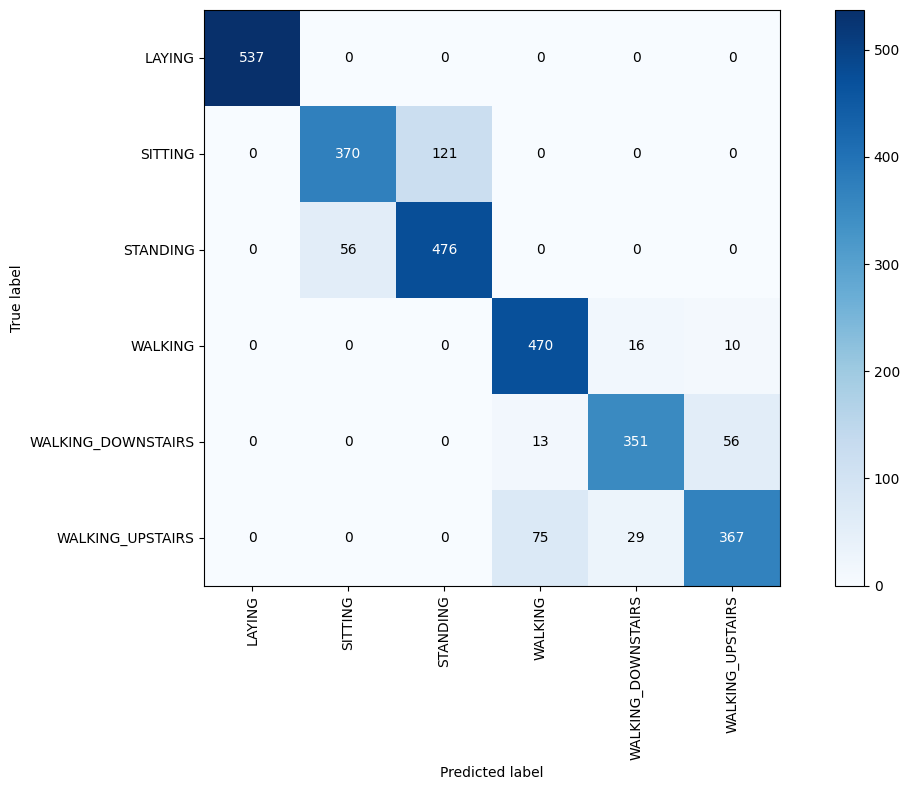

In [54]:
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred)) # plotting confusion matrix

In [55]:
# getting best random search attributes
get_best_randomsearch_results(dt_classifier_rs)

Best estimator :  DecisionTreeClassifier(max_depth=8)
Best set of parameters :  {'max_depth': 8}
Best score :  0.8513400574369788


### 5.e Random forest model with Hyperparameter tuning and cross validation

In [56]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(20,101,10), 'max_depth':np.arange(2,16,2)}
rf_classifier = RandomForestClassifier()
rf_classifier_rs = RandomizedSearchCV(rf_classifier, param_distributions=params,random_state = 42)
rf_classifier_rs.fit(X_train, y_train)
y_pred = rf_classifier_rs.predict(X_test)

In [57]:
rf_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Random forest : ", rf_accuracy)

Accuracy using Random forest :  0.9267051238547676


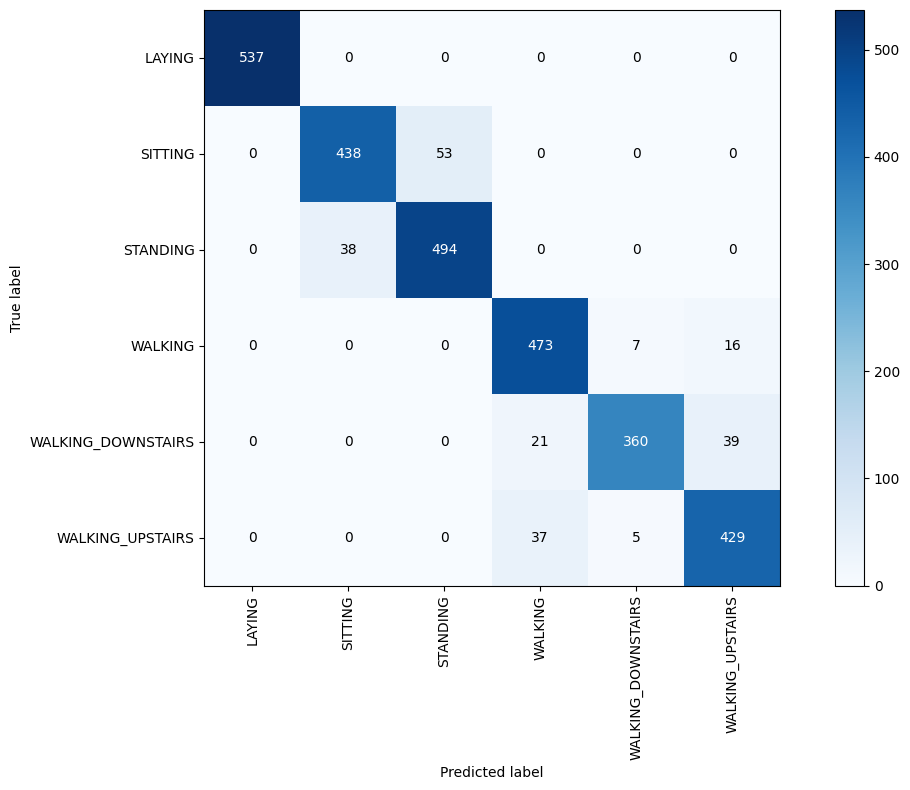

In [58]:
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred)) # plotting confusion matrix

In [59]:
# getting best random search attributes
get_best_randomsearch_results(rf_classifier_rs)

Best estimator :  RandomForestClassifier(max_depth=14, n_estimators=80)
Best set of parameters :  {'n_estimators': 80, 'max_depth': 14}
Best score :  0.9211131305003306


### Conclusion


In [62]:
# get the best model and its accuracy
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Linear SVM', 'Kernel SVM', 'Decision Tree', 'Random Forest'],
    'Score': [lr_accuracy, lr_svm_accuracy, kernel_svm_accuracy, dt_accuracy, rf_accuracy]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Linear SVM,0.969121
0,Logistic Regression,0.956905
2,Kernel SVM,0.942314
4,Random Forest,0.926705
3,Decision Tree,0.872413


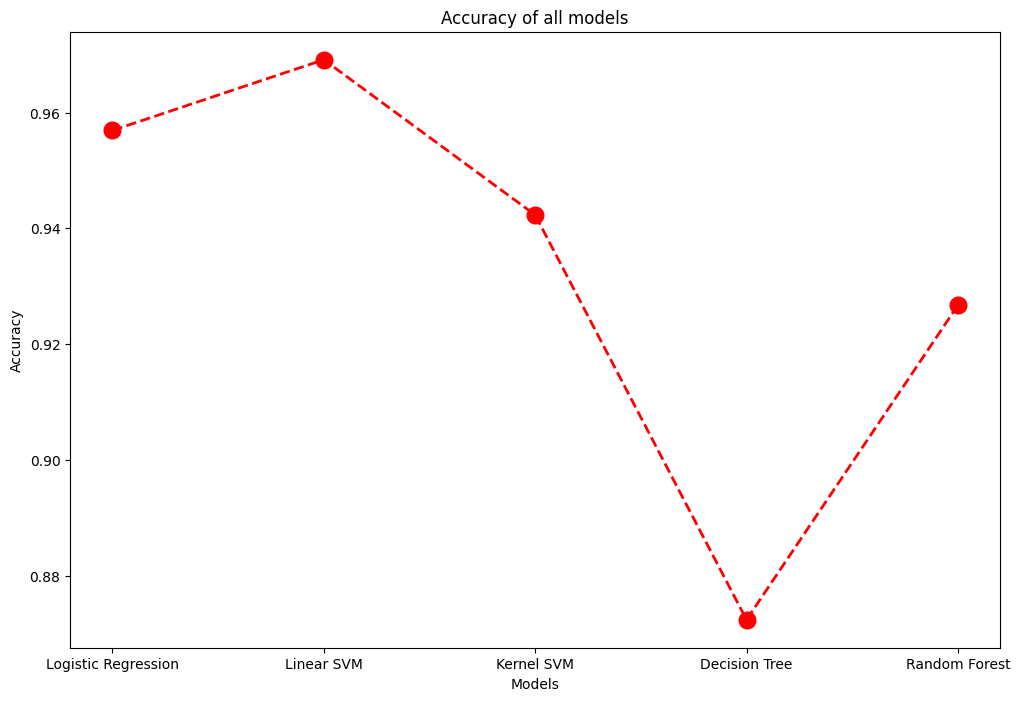

In [72]:
# plot the accuracy of all models in line plot
plt.figure(figsize=(12,8))
plt.plot(models['Model'], models['Score'], color='red', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.title('Accuracy of all models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()


In this kernel we built multiple different models using various classification algorithms. The accuracy obtained through these models is as follows - 

|  Logistic  |  Linear SVM  |  Kernel SVM  |  Decision Trees  | Random Forest |
|------|------|------|------|------|
|  95.69 | 96.91| 94.23 | 87.24 | 92.67 |